<a href="https://colab.research.google.com/github/aka-hombre/MAT422/blob/main/MAT422_HW1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
import random
from IPython.display import display, Latex
from sympy import *

In [3]:
#Helper functions!

def gram_schmidt_columns(matrix): #previous gram schmidt algorith from past notebook
    def normalize(v):
        norm = np.linalg.norm(v)
        if norm == 0:  # Handle zero vector case
            return v
        return v / norm

    def project(u, v):
        return np.dot(v, u) / np.dot(u, u) * u

    matrix = np.array(matrix, dtype=float).T  # Transpose to work with columns
    orthogonal_vectors = []

    for v in matrix:
        for u in orthogonal_vectors:
            v = v - project(u, v)
        orthogonal_vectors.append(v)

    orthonormal_vectors = [normalize(v) for v in orthogonal_vectors if np.linalg.norm(v) > 1e-10]

    return np.array(orthonormal_vectors).T  # Transpose back to original form


def matdisp(*matrix):
    parent_str = ''

    for A in matrix:
        if isinstance(A, str):
            parent_str += A
            continue

        # Ensure the input is a NumPy array
        A = np.array(A)

        # Create a formatted LaTeX string for the matrix
        A_str = r'\begin{bmatrix}'

        # Check if A is a vector (1D array)
        if A.ndim == 1:  # If it's a vector
            for x in A:
                # Append each element as a new row
                if isinstance(x, int):
                    A_str += f'{x:d} \\\\ '
                elif isinstance(x, float):
                    A_str += f'{x:.2f} \\\\ '  # Format floats to 2 decimal places
                else:
                    A_str += f'{str(x)} \\\\ '  # Fallback to string representation for other types
        else:  # Handle 2D arrays
            for row in A:
                row_str = []
                for x in row:
                    if isinstance(x, int):
                        row_str.append(f'{x:d}')
                    elif isinstance(x, float):
                        row_str.append(f'{x:.2f}')  # Format floats to 2 decimal places
                    else:
                        row_str.append(str(x))  # Fallback to string representation for other types
                A_str += ' & '.join(row_str) + r' \\ '

        A_str += r'\end{bmatrix}'
        parent_str += A_str

    display(Latex(f'${parent_str}$'))

#1.3.1 - QR decomposition

Here we will use python to give an example of the process of QR decomposing a random matrix.

In [4]:
A = np.random.randint(100, size=(5,5)) #Generate a random matrix of integers


print("Here is our randomized matrix:\n")
matdisp(A)

Q = gram_schmidt_columns(A) #Constructing out Q matrix

print("\nHere is our Q matrix:\n")
matdisp(Q)

Here is our randomized matrix:



<IPython.core.display.Latex object>


Here is our Q matrix:



<IPython.core.display.Latex object>

Recall $A = QR$, so $R =Q^{-1}A$. We will compute the R matrix bellow

In [5]:
R = np.matmul(np.linalg.inv(Q), A) #R = Q^-1 * A

print("\nHere is our R matrix:\n")
matdisp(R)

print("\nHere is the product QR:\n")

QR = np.matmul(Q,R) #multiplication QR
matdisp(QR)
print("\nNotice it's the same as the original!")


Here is our R matrix:



<IPython.core.display.Latex object>


Here is the product QR:



<IPython.core.display.Latex object>


Notice it's the same as the original!


#1.3.2 Least-squares Problems

For this section we'll be doing a visual representation of solving a least-squares probem. Here $A\in \mathbb{R}^{3x2}$ and $\mathbf{b}, \mathbf{x}\in\mathbb{R}^3$. So our general problem, in this scenario is:
\begin{equation}
\begin{bmatrix}a & b\\ c &d\\e&f\end{bmatrix}\mathbf{x} = \begin{bmatrix}j\\k\\l\end{bmatrix}
\end{equation}
where $\mathbf{b}\notin\mathbf{col}(A)$

The plotted plane is randomly generated and represents, the $\mathbf{col}(A)$. The red vector is our $\mathbf{b}$ vector.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

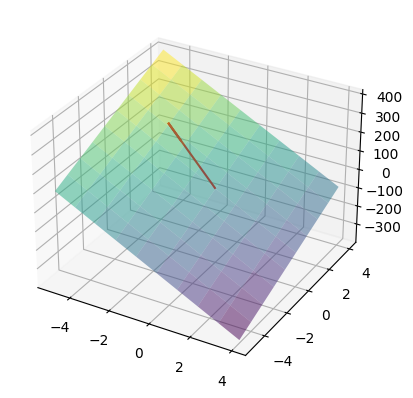

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>


Here we have the following:


In [6]:
A = np.random.randint(10, size=(3, 2)) #generating a nxm matrix
bv = -np.cross(A[:, 0], A[:, 1]) #by taking the cross product of the two colums, we generate a vector outside col(A)
bn = bv/(np.linalg.norm(bv))
v = bv + A[:,0] #b vector in this example

#Generate plane from vectors
xx, yy = np.meshgrid(range(-5, 5), range(-5, 5))
a, b, c = bn
zz = (-a * xx - b * yy) / c

matdisp(r'A\mathbf{x} = \mathbf{b}')
matdisp(A,'\mathbf{x}=', v)
# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.5, cmap='viridis') # plot a plane given the two vectors

ax.quiver(0, 0, 0, v[0], v[1], v[2], color='r', length=0.1) # b vector
plt.show()


#Numpy has a built in QR Decomposition, so we'll use it here!
[Q, R] = np.linalg.qr(A)

print("\nHere we have the following:")
matdisp(r'A=QR')
matdisp(A, r'=',Q, R)

Recall our orthognal projection matrix, ie $\mathbf{proj}_{\mathbf{col}(A)}= QQ^T$. So our least squares problem becomes
\begin{equation}
A\mathbf{x}^* = QQ^T\mathbf{b}
\end{equation}
and after some algebraic manipulations,
\begin{equation}
R\mathbf{x}^* = Q^T\mathbf{b}
\end{equation}

where $R$ and $Q$ are from our $QR$ decomposition. Let's see what we get.

In [7]:
matdisp(r'R\mathbf{x}^* = Q^T\mathbf{b}')
matdisp(R,r'\mathbf{x}^*=', np.transpose(Q), v)
matdisp(R,r'\mathbf{x}^*=',np.matmul(np.transpose(Q), v))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Now we solve for $\mathbf{x}^*$, so $\mathbf{x}^* = R^{-1}Q^T\mathbf{b}$

Here is out solution!


<IPython.core.display.Latex object>


Let's double check Rx:


<IPython.core.display.Latex object>


It's correct! now we will plot the vector. x^* is in blue and our b vector is in red:


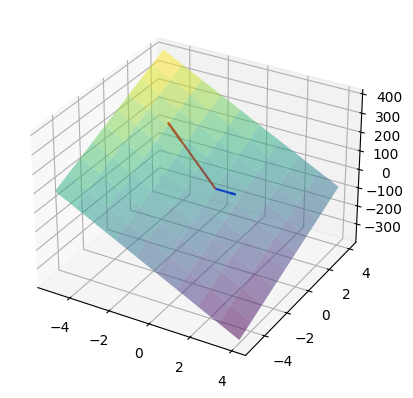

In [8]:
Qtb = np.matmul(np.transpose(Q), v)
xs = np.matmul(np.linalg.inv(R), Qtb)

print("Here is out solution!")
matdisp(r'\mathbf{x}^* =',xs)
print("\nLet's double check Rx:")
matdisp(R,xs,r'=',np.matmul(R,xs))

print("\nIt's correct! now we will plot the vector. x^* is in blue and our b vector is in red:")

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.5, cmap='viridis') # plot a plane given the two vectors

ax.quiver(0, 0, 0, v[0], v[1], v[2], color='r', length=0.1) # b vector
ax.quiver(0, 0, 0, xs[0], xs[1], 0, color='b', length=1) # x^* vector
plt.show()


#1.3.3 - Linear Regression

Recall for a sequence of 2d data points $\{(\mathbf{x}_i, y_i)\}^n_{i=0}$ with each $\mathbf{x}_i = (x_{i1},\dots, x_{id})^T,$ we seek an affine function to fit the data. The common (and in this) approch, involves finding coefficients $\mathbf{\beta}_j$'s that minimize the criterion.

\begin{equation}
\sum_i^n(y_i-\hat{y}_i)^2
\end{equation}

where
\begin{equation}
\hat{y}_i = \beta_o + \sum_{j=1}^n\beta_jx_{ij}
\end{equation}
So the minimization function can be formulated in matrix form. Let
\begin{equation}
\mathbf{y} = \begin{pmatrix}y_1\\y_2\\ \vdots \\ y_n\end{pmatrix}, \quad A = \begin{pmatrix}1 & x_1^T \\ 1 & x_2^T \\ \vdots & \vdots \\ 1 & x_n^T\end{pmatrix} \quad\text{and}\quad \mathbf{\beta} = \begin{pmatrix}\beta_o \\ \beta_1 \\ \vdots \\ \beta_d \end{pmatrix}
\end{equation}
and we are finding
\begin{equation}
\min_\beta||\mathbf{y}-A\beta||^2
\end{equation}
Recall in 1.3.2 our least squares problem of $A\mathbf{x}=\mathbf{b}$ became $\mathbf{A}\mathbf{x}^*=QQ^T\mathbf{b}$, and $QR\mathbf{x}^*=QQ^T\mathbf{b}$.

Here $A\beta$ represents our $\hat{y}$, that we are minimizing for. From the previous section we get,
\begin{equation}
\beta^* = R^{-1}Q^Ty
\end{equation}

Let's derive it and program it form scratch.

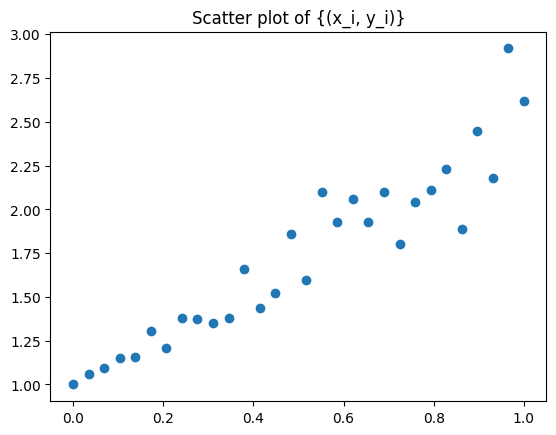

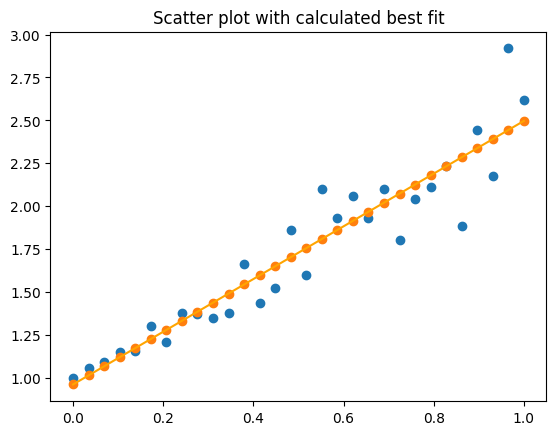

In [29]:
#Generating random x and y
x = np.transpose(np.linspace(0, 1, 30))
y = np.transpose(1 + x + x * np.random.random(len(x)))

A = np.concatenate((np.ones((30, 1)), x.reshape(-1, 1)), axis=1) #constructing our A matrix
[Q, R] = np.linalg.qr(A) #QR decomposition of A

plt.figure() #plotting our data
plt.scatter(x, y)
plt.title("Scatter plot of {(x_i, y_i)}")

#Calculating yhat
Qty = np.matmul(np.transpose(Q), y) #Q^Ty
B = np.matmul(np.linalg.inv(R), Qty) #R^{-1}Q^Ty
yhat = np.matmul(A, B)

#Scatter plot with expected yhat
plt.figure()
plt.title('Scatter plot with calculated best fit')
plt.scatter(x,y)

plt.scatter(x, yhat)
plt.plot(x,yhat, color='orange') #connects the data points to plot best fit line